In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

image_file = 'image.jpg'
input_image = imread(image_file)  # this is the array representation of the input image
[nx, ny, nz] = np.shape(input_image)  # nx: height, ny: width, nz: colors (RGB)

# Extracting each one of the RGB components
r_img, g_img, b_img = input_image[:, :, 0], input_image[:, :, 1], input_image[:, :, 2]

# The following operation will take weights and parameters to convert the color image to grayscale
gamma = 1.400  # a parameter
r_const, g_const, b_const = 0.2126, 0.7152, 0.0722  # weights for the RGB components respectively
grayscale_image = r_const * r_img ** gamma + g_const * g_img ** gamma + b_const * b_img ** gamma



In [2]:
grayscale_image

array([[564.73038036, 573.07068988, 573.07068988, ..., 518.02496452,
        518.02496452, 518.02496452],
       [573.07068988, 573.07068988, 573.07068988, ..., 518.02496452,
        518.02496452, 518.02496452],
       [573.07068988, 573.07068988, 573.07068988, ..., 518.02496452,
        518.02496452, 518.02496452],
       ...,
       [953.81971745, 953.81971745, 953.81971745, ..., 903.65150519,
        903.65150519, 903.65150519],
       [949.96921436, 949.96921436, 949.96921436, ..., 899.97551496,
        899.97551496, 899.97551496],
       [949.96921436, 949.96921436, 949.96921436, ..., 899.97551496,
        899.97551496, 899.97551496]])

C:\Users\MUHAMMED FAISAL\AppData\Local\Temp\ipykernel_29364\2894273704.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


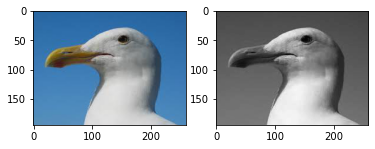

In [3]:
# This command will display the grayscale image alongside the original image
fig1 = plt.figure(1)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(grayscale_image, cmap=plt.get_cmap('gray'))
fig1.show()



C:\Users\MUHAMMED FAISAL\AppData\Local\Temp\ipykernel_29364\4065080573.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


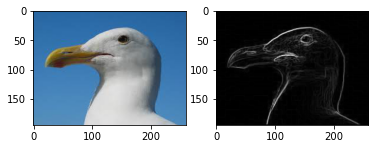

In [4]:
# #---------------------------------------------------------------------------------------------------------------------
# PART II - Applying the Sobel operator
# #---------------------------------------------------------------------------------------------------------------------

"""
The kernels Gx and Gy can be thought of as a differential operation in the "input_image" array in the directions x and y 
respectively. These kernels are represented by the following matrices:
      _               _                   _                _
     |                 |                 |                  |
     | 1.0   0.0  -1.0 |                 |  1.0   2.0   1.0 |
Gx = | 2.0   0.0  -2.0 |    and     Gy = |  0.0   0.0   0.0 |
     | 1.0   0.0  -1.0 |                 | -1.0  -2.0  -1.0 |
     |_               _|                 |_                _|
"""

# Here we define the matrices associated with the Sobel filter
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
[rows, columns] = np.shape(grayscale_image)  # we need to know the shape of the input grayscale image
sobel_filtered_image = np.zeros(shape=(rows, columns))  # initialization of the output image array (all elements are 0)

# Now we "sweep" the image in both x and y directions and compute the output
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))  # x direction
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3]))  # y direction
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  # calculate the "hypotenuse"

# Display the original image and the Sobel filtered image
fig2 = plt.figure(2)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
fig2.show()

In [5]:
cv2.imshow('so',sobel_filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [ ]:
sobel_filtered_image